# Introductory football analysis (Pass maps, Shot Maps, Heat Maps) and Network Analysis

* This notebook is copied and fixed some errors from https://github.com/indrag49/football-analysis-project

## 1. Import required Python libraries

In [1]:
from statsbombpy import sb
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns
import numpy as np
import pandas as pd
import networkx as nx
import math

## 2. Get Competitions data from https://statsbomb.com/

In [2]:
sb.competitions()

competition_id  season_id              country_name  \
0               16          4                    Europe   
1               16          1                    Europe   
2               16          2                    Europe   
3               16         27                    Europe   
4               16         26                    Europe   
5               16         25                    Europe   
6               16         24                    Europe   
7               16         23                    Europe   
8               16         22                    Europe   
9               16         21                    Europe   
10              16         41                    Europe   
11              16         39                    Europe   
12              16         37                    Europe   
13              16         44                    Europe   
14              16         76                    Europe   
15              37         90                   England   
16              37         42                   England   
17              37          4                   England   
18              43        106             International   
19              43          3             International   
20            1238        108                     India   
21              11         90                     Spain   
22              11         42                     Spain   
23              11          4                     Spain   
24              11          1                     Spain   
25              11          2                     Spain   
26              11         27                     Spain   
27              11         26                     Spain   
28              11         25                     Spain   
29              11         24                     Spain   
30              11         23                     Spain   
31              11         22                     Spain   
32              11         21                     Spain   
33              11         41                     Spain   
34              11         40                     Spain   
35              11         39                     Spain   
36              11         38                     Spain   
37              11         37                     Spain   
38              49          3  United States of America   
39               2         44                   England   
40              55         43                    Europe   
41              53        106                    Europe   
42              72         30             International   

           competition_name competition_gender  competition_youth  \
0          Champions League               male              False   
1          Champions League               male              False   
2          Champions League               male              False   
3          Champions League               male              False   
4          Champions League               male              False   
5          Champions League               male              False   
6          Champions League               male              False   
7          Champions League               male              False   
8          Champions League               male              False   
9          Champions League               male              False   
10         Champions League               male              False   
11         Champions League               male              False   
12         Champions League               male              False   
13         Champions League               male              False   
14         Champions League               male              False   
15  FA Women's Super League             female              False   
16  FA Women's Super League             female              False   
17  FA Women's Super League             female              False   
18           FIFA World Cup               male              False   
19           FIFA World Cup

## 3. Extract 2022 FIFA World Cup data from Competitions data

In [3]:
sb.matches(competition_id=43, season_id=106).head(60)

match_id  match_date      kick_off                     competition season  \
0    3869254  2022-12-06  21:00:00.000  International - FIFA World Cup   2022   
1    3869118  2022-12-04  21:00:00.000  International - FIFA World Cup   2022   
2    3869486  2022-12-10  17:00:00.000  International - FIFA World Cup   2022   
3    3869685  2022-12-18  17:00:00.000  International - FIFA World Cup   2022   
4    3869684  2022-12-17  17:00:00.000  International - FIFA World Cup   2022   
5    3869519  2022-12-13  21:00:00.000  International - FIFA World Cup   2022   
6    3869354  2022-12-10  21:00:00.000  International - FIFA World Cup   2022   
7    3869552  2022-12-14  21:00:00.000  International - FIFA World Cup   2022   
8    3869420  2022-12-09  17:00:00.000  International - FIFA World Cup   2022   
9    3869321  2022-12-09  21:00:00.000  International - FIFA World Cup   2022   
10   3869220  2022-12-06  17:00:00.000  International - FIFA World Cup   2022   
11   3869219  2022-12-05  17:00:00.000  International - FIFA World Cup   2022   
12   3869253  2022-12-05  21:00:00.000  International - FIFA World Cup   2022   
13   3869151  2022-12-03  21:00:00.000  International - FIFA World Cup   2022   
14   3869152  2022-12-04  17:00:00.000  International - FIFA World Cup   2022   
15   3869117  2022-12-03  17:00:00.000  International - FIFA World Cup   2022   
16   3857256  2022-12-02  21:00:00.000  International - FIFA World Cup   2022   
17   3857270  2022-11-28  21:00:00.000  International - FIFA World Cup   2022   
18   3857269  2022-11-28  18:00:00.000  International - FIFA World Cup   2022   
19   3857263  2022-11-27  21:00:00.000  International - FIFA World Cup   2022   
20   3857259  2022-11-28  12:00:00.000  International - FIFA World Cup   2022   
21   3857295  2022-11-27  12:00:00.000  International - FIFA World Cup   2022   
22   3857266  2022-11-26  18:00:00.000  International - FIFA World Cup   2022   
23   3857283  2022-11-27  15:00:00.000  International - FIFA World Cup   2022   
24   3857284  2022-11-23  15:00:00.000  International - FIFA World Cup   2022   
25   3857282  2022-11-21  21:00:00.000  International - FIFA World Cup   2022   
26   3857286  2022-11-20  18:00:00.000  International - FIFA World Cup   2022   
27   3857301  2022-11-25  15:00:00.000  International - FIFA World Cup   2022   
28   3857300  2022-11-22  12:00:00.000  International - FIFA World Cup   2022   
29   3857299  2022-11-28  15:00:00.000  International - FIFA World Cup   2022   
30   3857298  2022-11-24  18:00:00.000  International - FIFA World Cup   2022   
31   3857297  2022-11-26  15:00:00.000  International - FIFA World Cup   2022   
32   3857296  2022-12-01  17:00:00.000  International - FIFA World Cup   2022   
33   3857294  2022-11-29  17:00:00.000  International - FIFA World Cup   2022   
34   3857293  2022-12-02  17:00:00.000  International - FIFA World Cup   2022   
35   3857292  2022-12-01  21:00:00.000  International - FIFA World Cup   2022   
36   3857291  2022-11-23  18:00:00.000  International - FIFA World Cup   2022   
37   3857290  2022-11-24  12:00:00.000  International - FIFA World Cup   2022   
38   3857289  2022-11-26  21:00:00.000  International - FIFA World Cup   2022   
39   3857288  2022-11-26  12:00:00.000  International - FIFA World Cup   2022   
40   3857287  2022-11-24  15:00:00.000  International - FIFA World Cup   2022   
41   3857285  2022-11-21  18:00:00.000  International - FIFA World Cup   2022   
42   3857281  2022-11-27  18:00:00.000  International - FIFA World Cup   2022   
43   3857280  2022-12-02  21:00:00.000  International - FIFA World Cup   2022   
44   3857279  2022-11-22  21:00:00.000  International - FIFA World Cup   2022   
45   3857278  2022-11-29  21:00:00.000  International - FIFA World Cup   2022   
46   3857277  2022-11-23  12:00:00.000  International - FIFA World Cup   2022   
47   3857276  2022-12-01  17:00:00.000  International - FIFA World Cup   2022   
48   3857275  2022-11-30  17:00:00.

## 4. Extract South Korea vs Portugal Match data

In [4]:
events=sb.events(match_id=3857262)
events.head()

bad_behaviour_card ball_receipt_outcome ball_recovery_offensive  \
0                NaN                  NaN                     NaN   
1                NaN                  NaN                     NaN   
2                NaN                  NaN                     NaN   
3                NaN                  NaN                     NaN   
4                NaN                  NaN                     NaN   

  ball_recovery_recovery_failure block_deflection carry_end_location  \
0                            NaN              NaN                NaN   
1                            NaN              NaN                NaN   
2                            NaN              NaN                NaN   
3                            NaN              NaN                NaN   
4                            NaN              NaN                NaN   

  clearance_aerial_won clearance_body_part clearance_head clearance_left_foot  \
0                  NaN                 NaN            NaN                 NaN   
1                  NaN                 NaN            NaN                 NaN   
2                  NaN                 NaN            NaN                 NaN   
3                  NaN                 NaN            NaN                 NaN   
4                  NaN                 NaN            NaN                 NaN   

   ... shot_statsbomb_xg shot_technique shot_type substitution_outcome  \
0  ...               NaN            NaN       NaN                  NaN   
1  ...               NaN            NaN       NaN                  NaN   
2  ...               NaN            NaN       NaN                  NaN   
3  ...               NaN            NaN       NaN                  NaN   
4  ...               NaN            NaN       NaN                  NaN   

  substitution_replacement                                            tactics  \
0                      NaN  {'formation': 433, 'lineup': [{'player': {'id'...   
1                      NaN  {'formation': 433, 'lineup': [{'player': {'id'...   
2                      NaN                                                NaN   
3                      NaN                                                NaN   
4                      NaN                                                NaN   

          team     timestamp         type under_pressure  
0  South Korea  00:00:00.000  Starting XI            NaN  
1     Portugal  00:00:00.000  Starting XI            NaN  
2     Portugal  00:00:00.000   Half Start            NaN  
3  South Korea  00:00:00.000   Half Start            NaN  
4  South Korea  00:00:00.000   Half Start            NaN  

[5 rows x 86 columns]

## 5. Analyze South Korea vs Portugal Match

### 5.1 Rearrange Dataframe using several column names

In [5]:
events_1=events[['team', 'type', 'minute', 'location', 'pass_end_location', 'pass_outcome', 'player']]
events_1

team           type  minute location pass_end_location  \
0     South Korea    Starting XI       0      NaN               NaN   
1        Portugal    Starting XI       0      NaN               NaN   
2        Portugal     Half Start       0      NaN               NaN   
3     South Korea     Half Start       0      NaN               NaN   
4     South Korea     Half Start      45      NaN               NaN   
...           ...            ...     ...      ...               ...   
3368  South Korea   Substitution      81      NaN               NaN   
3369     Portugal   Substitution      81      NaN               NaN   
3370     Portugal   Substitution      81      NaN               NaN   
3371  South Korea   Substitution      92      NaN               NaN   
3372  South Korea  Bad Behaviour      92      NaN               NaN   

     pass_outcome                             player  
0             NaN                                NaN  
1             NaN                                NaN  
2             NaN                                NaN  
3             NaN                                NaN  
4             NaN                                NaN  
...           ...                                ...  
3368          NaN                        Kang-In Lee  
3369          NaN  João Mário Naval da Costa Eduardo  
3370          NaN             Vitor Machado Ferreira  
3371          NaN                       Gue-Sung Cho  
3372          NaN                     Hee-Chan Hwang  

[3373 rows x 7 columns]

### 5.2 Check all players

In [6]:
events_1.player.unique()

array([nan, 'Gue-Sung Cho', 'Woo-Young Jung', 'Young-Gwon Kim',
       'Jin-Su Kim', 'Heung-Min Son', 'Kang-In Lee', 'In-Beom Hwang',
       'Kyung-Won Kwon', 'Moon-Hwan Kim', 'Seung-Gyu Kim', 'Jae-Sung Lee',
       'João Pedro Cavaco Cancelo', 'Rúben Diogo Da Silva Neves',
       'José Diogo Dalot Teixeira',
       'António João Pereira Albuquerque Tavares Silva',
       'Vitor Machado Ferreira', 'Kléper Laveran Lima Ferreira',
       'João Mário Naval da Costa Eduardo',
       'Cristiano Ronaldo dos Santos Aveiro', 'Matheus Luiz Nunes',
       'Diogo Meireles Costa', 'Ricardo Jorge Luz Horta',
       'Hee-Chan Hwang', 'Rafael Alexandre Conceição Leão',
       'João Maria Lobo Alves Palhinha Gonçalves',
       'André Miguel Valente Silva', 'Jun-Ho Son',
       'William Silva de Carvalho',
       'Bernardo Mota Veiga de Carvalho e Silva', 'Ui-Jo Hwang',
       'Yu-Min Cho'], dtype=object)

### 5.3 Select "Heung-Min Son" to analyze his performance

In [7]:
events_1=events_1[events_1['player']=='Heung-Min Son'].reset_index()
events_1

index         team          type  minute       location  \
0       11  South Korea          Pass       0   [57.6, 21.3]   
1       27  South Korea          Pass       1  [112.3, 71.3]   
2      210  South Korea          Pass      16   [120.0, 0.1]   
3      212  South Korea          Pass      16   [103.4, 3.1]   
4      257  South Korea          Pass      20   [99.9, 11.3]   
..     ...          ...           ...     ...            ...   
104   3324  South Korea  Dispossessed      21  [118.1, 21.9]   
105   3325  South Korea  Dispossessed      30  [100.6, 36.2]   
106   3330  South Korea  Dispossessed      61   [24.4, 59.3]   
107   3334  South Korea  Dispossessed      87   [93.3, 40.6]   
108   3335  South Korea  Dispossessed      96   [76.4, 74.4]   

    pass_end_location pass_outcome         player  
0         [51.0, 9.6]          NaN  Heung-Min Son  
1        [99.4, 72.2]          NaN  Heung-Min Son  
2         [93.4, 8.5]          NaN  Heung-Min Son  
3       [111.1, 32.0]          NaN  Heung-Min Son  
4        [87.5, 18.3]          NaN  Heung-Min Son  
..                ...          ...            ...  
104               NaN          NaN  Heung-Min Son  
105               NaN          NaN  Heung-Min Son  
106               NaN          NaN  Heung-Min Son  
107               NaN          NaN  Heung-Min Son  
108               NaN          NaN  Heung-Min Son  

[109 rows x 8 columns]

### 5.4 Check types of Performance

In [8]:
events_1.type.unique()

array(['Pass', 'Ball Receipt*', 'Carry', 'Pressure', 'Ball Recovery',
       'Foul Won', 'Miscontrol', 'Dribble', 'Duel', 'Shot', 'Block',
       'Clearance', 'Dispossessed'], dtype=object)

### 5.5 "Pass" Analysis

#### 5.5.1 Select "Pass" 

In [9]:
events_1 = events_1[events_1['type'].isin(['Pass'])]
events_1

index         team  type  minute       location pass_end_location  \
0      11  South Korea  Pass       0   [57.6, 21.3]       [51.0, 9.6]   
1      27  South Korea  Pass       1  [112.3, 71.3]      [99.4, 72.2]   
2     210  South Korea  Pass      16   [120.0, 0.1]       [93.4, 8.5]   
3     212  South Korea  Pass      16   [103.4, 3.1]     [111.1, 32.0]   
4     257  South Korea  Pass      20   [99.9, 11.3]      [87.5, 18.3]   
5     261  South Korea  Pass      20    [98.0, 3.1]       [83.7, 5.2]   
6     270  South Korea  Pass      21    [99.9, 3.0]       [89.7, 3.8]   
7     326  South Korea  Pass      25    [98.5, 2.7]       [79.6, 5.4]   
8     332  South Korea  Pass      27   [76.8, 17.3]      [64.5, 21.5]   
9     529  South Korea  Pass      46     [3.2, 9.2]       [75.2, 0.1]   
10    608  South Korea  Pass      50   [74.1, 72.4]      [76.4, 61.1]   
11    665  South Korea  Pass      56  [120.0, 80.0]     [114.0, 44.4]   
12    690  South Korea  Pass      58   [21.2, 76.7]      [46.1, 77.4]   
13    798  South Korea  Pass      69   [40.1, 68.5]      [18.8, 34.5]   
14    802  South Korea  Pass      71  [120.0, 80.0]     [111.6, 44.8]   
15    875  South Korea  Pass      82   [64.5, 64.8]      [52.6, 49.8]   
16    906  South Korea  Pass      84   [93.0, 53.3]     [101.0, 58.3]   
17    911  South Korea  Pass      85  [120.0, 80.0]     [111.4, 43.7]   
18    974  South Korea  Pass      90   [98.3, 52.3]     [108.3, 44.6]   
19   1009  South Korea  Pass      96   [88.1, 78.2]      [79.6, 76.2]   

   pass_outcome         player  
0           NaN  Heung-Min Son  
1           NaN  Heung-Min Son  
2           NaN  Heung-Min Son  
3           NaN  Heung-Min Son  
4           NaN  Heung-Min Son  
5           NaN  Heung-Min Son  
6           NaN  Heung-Min Son  
7           NaN  Heung-Min Son  
8           NaN  Heung-Min Son  
9           Out  Heung-Min Son  
10          NaN  Heung-Min Son  
11   Incomplete  Heung-Min Son  
12   Incomplete  Heung-Min Son  
13          NaN  Heung-Min Son  
14   Incomplete  Heung-Min Son  
15          NaN  Heung-Min Son  
16          NaN  Heung-Min Son  
17          NaN  Heung-Min Son  
18          NaN  Heung-Min Son  
19          NaN  Heung-Min Son

#### 5.5.2 Display his Pass during the match

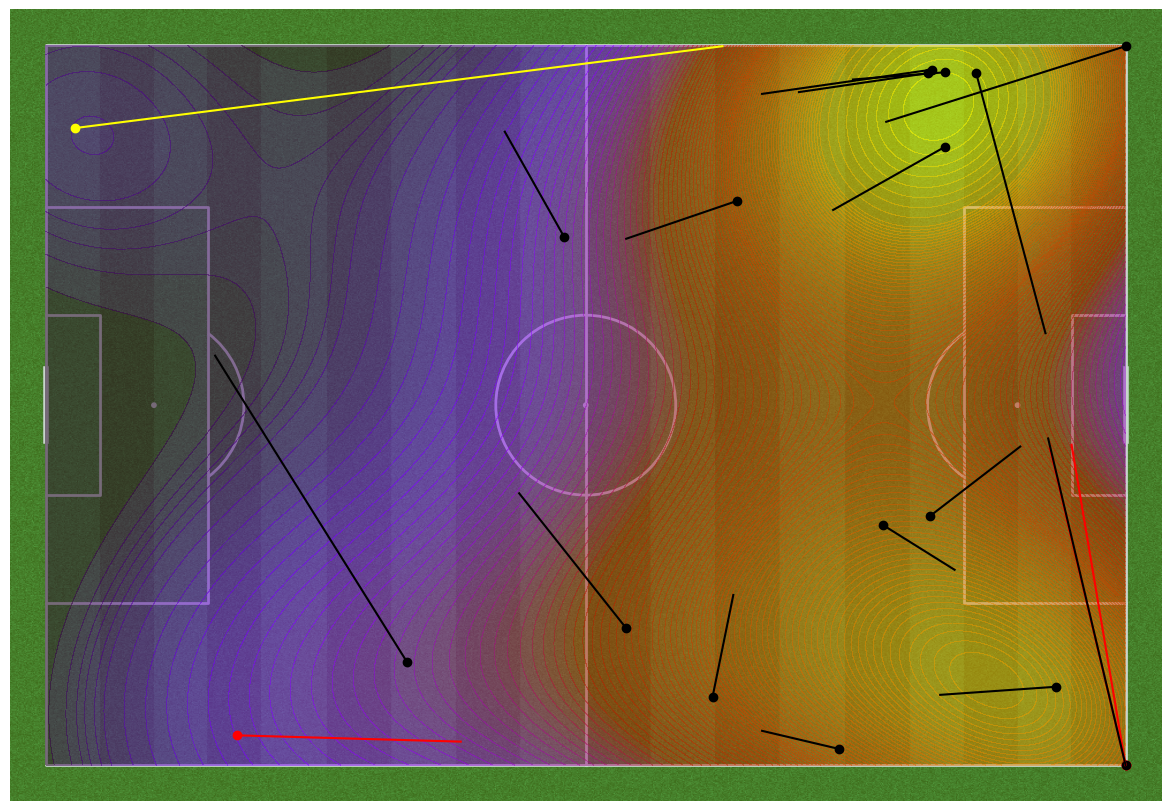

In [10]:
Loc = events_1['location']
Loc = pd.DataFrame(Loc.to_list(), columns=['x', 'y'])

pitch = Pitch(pitch_type='statsbomb',
              pitch_color='grass', line_color='#c7d5cc', 
              stripe=True)
fig, ax = pitch.draw(figsize=(13.5, 8), constrained_layout=True, tight_layout=False)
#plt.gca().invert_yaxis()

kde = pitch.kdeplot(
    Loc['x'], Loc['y'], ax=ax,
    fill=True, levels=100,
    # shade the lowest area so it looks smooth
    # so even if there are no events it gets some color
    shade_lowest=True,
    thresh=0.05,
    alpha = 0.5,
    cut=4,  # extended the cut so it reaches the bottom edge
    cmap='gnuplot')

for i in range(len(events_1)):
    if events_1.pass_outcome[i]=='Incomplete' or events_1.pass_outcome[i]=='Unknown':
        plt.plot((events_1.location[i][0], events_1.pass_end_location[i][0]), (events_1.location[i][1], events_1.pass_end_location[i][1]), color='red')
        plt.scatter(events_1.location[i][0], events_1.location[i][1], color='red')
    elif events_1.pass_outcome[i]=='Pass Offside':
        plt.plot((events_1.location[i][0], events_1.pass_end_location[i][0]), (events_1.location[i][1], events_1.pass_end_location[i][1]), color='blue')
        plt.scatter(events_1.location[i][0], events_1.location[i][1], color='blue')
    elif events_1.pass_outcome[i]=='Out':
        plt.plot((events_1.location[i][0], events_1.pass_end_location[i][0]), (events_1.location[i][1], events_1.pass_end_location[i][1]), color='yellow')
        plt.scatter(events_1.location[i][0], events_1.location[i][1], color='yellow')
    else:
        # successful pass, nan
        plt.plot((events_1.location[i][0], events_1.pass_end_location[i][0]), (events_1.location[i][1], events_1.pass_end_location[i][1]), color='black')
        plt.scatter(events_1.location[i][0], events_1.location[i][1], color='black')

#### 5.5.3 Assist Pass

In [11]:
events_1 = events_1[events_1['type'].isin(['Pass'])]
events_11 = events_1.iloc[0:19]
events_11

index         team  type  minute       location pass_end_location  \
0      11  South Korea  Pass       0   [57.6, 21.3]       [51.0, 9.6]   
1      27  South Korea  Pass       1  [112.3, 71.3]      [99.4, 72.2]   
2     210  South Korea  Pass      16   [120.0, 0.1]       [93.4, 8.5]   
3     212  South Korea  Pass      16   [103.4, 3.1]     [111.1, 32.0]   
4     257  South Korea  Pass      20   [99.9, 11.3]      [87.5, 18.3]   
5     261  South Korea  Pass      20    [98.0, 3.1]       [83.7, 5.2]   
6     270  South Korea  Pass      21    [99.9, 3.0]       [89.7, 3.8]   
7     326  South Korea  Pass      25    [98.5, 2.7]       [79.6, 5.4]   
8     332  South Korea  Pass      27   [76.8, 17.3]      [64.5, 21.5]   
9     529  South Korea  Pass      46     [3.2, 9.2]       [75.2, 0.1]   
10    608  South Korea  Pass      50   [74.1, 72.4]      [76.4, 61.1]   
11    665  South Korea  Pass      56  [120.0, 80.0]     [114.0, 44.4]   
12    690  South Korea  Pass      58   [21.2, 76.7]      [46.1, 77.4]   
13    798  South Korea  Pass      69   [40.1, 68.5]      [18.8, 34.5]   
14    802  South Korea  Pass      71  [120.0, 80.0]     [111.6, 44.8]   
15    875  South Korea  Pass      82   [64.5, 64.8]      [52.6, 49.8]   
16    906  South Korea  Pass      84   [93.0, 53.3]     [101.0, 58.3]   
17    911  South Korea  Pass      85  [120.0, 80.0]     [111.4, 43.7]   
18    974  South Korea  Pass      90   [98.3, 52.3]     [108.3, 44.6]   

   pass_outcome         player  
0           NaN  Heung-Min Son  
1           NaN  Heung-Min Son  
2           NaN  Heung-Min Son  
3           NaN  Heung-Min Son  
4           NaN  Heung-Min Son  
5           NaN  Heung-Min Son  
6           NaN  Heung-Min Son  
7           NaN  Heung-Min Son  
8           NaN  Heung-Min Son  
9           Out  Heung-Min Son  
10          NaN  Heung-Min Son  
11   Incomplete  Heung-Min Son  
12   Incomplete  Heung-Min Son  
13          NaN  Heung-Min Son  
14   Incomplete  Heung-Min Son  
15          NaN  Heung-Min Son  
16          NaN  Heung-Min Son  
17          NaN  Heung-Min Son  
18          NaN  Heung-Min Son

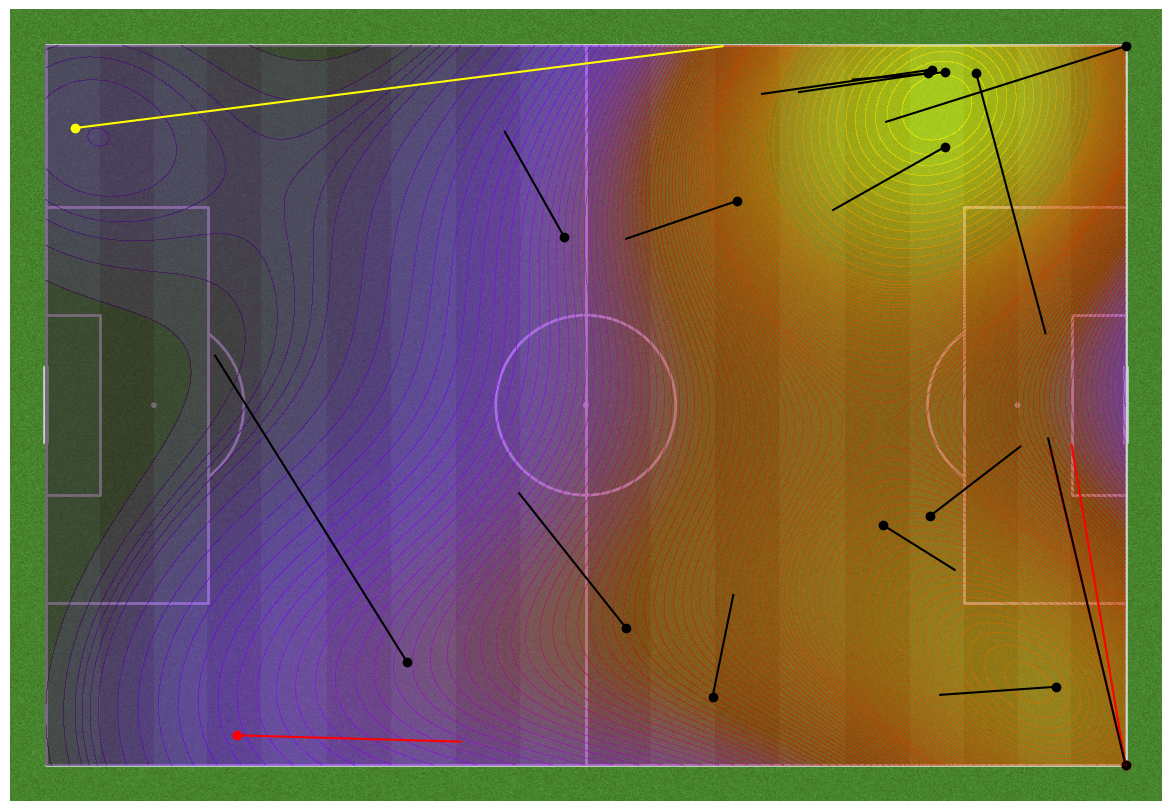

In [12]:
Loc = events_11['location']
Loc = pd.DataFrame(Loc.to_list(), columns=['x', 'y'])

pitch = Pitch(pitch_type='statsbomb',
              pitch_color='grass', line_color='#c7d5cc', 
              stripe=True)
fig, ax = pitch.draw(figsize=(13.5, 8), constrained_layout=True, tight_layout=False)
#plt.gca().invert_yaxis()

kde = pitch.kdeplot(
    Loc['x'], Loc['y'], ax=ax,
    fill=True, levels=100,
    # shade the lowest area so it looks smooth
    # so even if there are no events it gets some color
    shade_lowest=True,
    thresh=0.05,
    alpha = 0.5,
    cut=4,  # extended the cut so it reaches the bottom edge
    cmap='gnuplot')

for i in range(len(events_11)):
    if events_11.pass_outcome[i]=='Incomplete' or events_11.pass_outcome[i]=='Unknown':
        plt.plot((events_11.location[i][0], events_11.pass_end_location[i][0]), (events_11.location[i][1], events_11.pass_end_location[i][1]), color='red')
        plt.scatter(events_11.location[i][0], events_11.location[i][1], color='red')
    elif events_11.pass_outcome[i]=='Pass Offside':
        plt.plot((events_11.location[i][0], events_11.pass_end_location[i][0]), (events_11.location[i][1], events_11.pass_end_location[i][1]), color='blue')
        plt.scatter(events_11.location[i][0], events_11.location[i][1], color='blue')
    elif events_11.pass_outcome[i]=='Out':
        plt.plot((events_11.location[i][0], events_11.pass_end_location[i][0]), (events_11.location[i][1], events_11.pass_end_location[i][1]), color='yellow')
        plt.scatter(events_11.location[i][0], events_11.location[i][1], color='yellow')
    else:
        # successful pass, nan
        plt.plot((events_11.location[i][0], events_11.pass_end_location[i][0]), (events_11.location[i][1], events_11.pass_end_location[i][1]), color='black')
        plt.scatter(events_11.location[i][0], events_11.location[i][1], color='black')

#### 5.5.4 Plot Ratio of Successful Pass 

In [13]:
data=[]
for i in range(len(events_1)):
    if type(events_1.pass_outcome[i])==float:
        data.append('successful')
    else:
        data.append('unsuccessful')

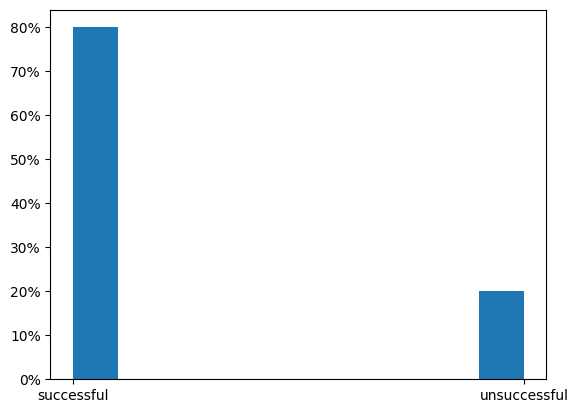

In [14]:
from matplotlib.ticker import PercentFormatter

plt.hist(data, weights=np.ones(len(data)) / len(data))

plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

### 5.6 "Shot" Analysis

In [15]:
events_2=events[['team', 'type', 'minute', 'location', 'shot_end_location', 'shot_outcome', 'player']]
events_2

team           type  minute location shot_end_location  \
0     South Korea    Starting XI       0      NaN               NaN   
1        Portugal    Starting XI       0      NaN               NaN   
2        Portugal     Half Start       0      NaN               NaN   
3     South Korea     Half Start       0      NaN               NaN   
4     South Korea     Half Start      45      NaN               NaN   
...           ...            ...     ...      ...               ...   
3368  South Korea   Substitution      81      NaN               NaN   
3369     Portugal   Substitution      81      NaN               NaN   
3370     Portugal   Substitution      81      NaN               NaN   
3371  South Korea   Substitution      92      NaN               NaN   
3372  South Korea  Bad Behaviour      92      NaN               NaN   

     shot_outcome                             player  
0             NaN                                NaN  
1             NaN                                NaN  
2             NaN                                NaN  
3             NaN                                NaN  
4             NaN                                NaN  
...           ...                                ...  
3368          NaN                        Kang-In Lee  
3369          NaN  João Mário Naval da Costa Eduardo  
3370          NaN             Vitor Machado Ferreira  
3371          NaN                       Gue-Sung Cho  
3372          NaN                     Hee-Chan Hwang  

[3373 rows x 7 columns]

In [16]:
events_2 = events_2[events_2['type'].isin(['Shot'])]
events_2

team  type  minute       location   shot_end_location  \
3200     Portugal  Shot       4  [113.6, 47.0]  [120.0, 40.6, 1.7]   
3201     Portugal  Shot      14  [117.5, 20.6]  [119.4, 36.0, 0.4]   
3202  South Korea  Shot      15  [108.5, 21.6]       [109.4, 23.2]   
3203  South Korea  Shot      16  [111.1, 32.0]  [118.7, 38.6, 0.9]   
3204  South Korea  Shot      26  [116.7, 38.0]  [120.0, 42.0, 0.6]   
3205  South Korea  Shot      30   [98.2, 31.4]        [99.7, 31.9]   
3206     Portugal  Shot      33   [92.8, 40.0]  [115.7, 38.0, 0.2]   
3207     Portugal  Shot      34   [91.6, 45.7]  [118.7, 41.6, 0.9]   
3208     Portugal  Shot      36  [110.6, 56.3]       [112.4, 52.9]   
3209  South Korea  Shot      39   [94.6, 44.2]  [118.7, 39.4, 0.5]   
3210     Portugal  Shot      40   [92.6, 58.9]  [120.0, 39.8, 7.0]   
3211     Portugal  Shot      41   [97.8, 46.9]  [118.7, 40.1, 1.1]   
3212     Portugal  Shot      41  [112.7, 35.0]  [120.0, 30.2, 2.4]   
3213     Portugal  Shot      43  [104.3, 43.4]  [119.0, 42.3, 0.8]   
3214     Portugal  Shot      46  [101.8, 45.2]       [104.3, 44.5]   
3215  South Korea  Shot      55  [104.5, 54.7]       [105.5, 53.6]   
3216  South Korea  Shot      56   [97.9, 50.9]  [120.0, 51.4, 0.9]   
3217  South Korea  Shot      65   [98.1, 47.1]  [118.8, 42.4, 1.5]   
3218  South Korea  Shot      66   [98.4, 35.1]  [116.6, 39.6, 2.0]   
3219  South Korea  Shot      69  [111.1, 52.8]       [113.5, 49.9]   
3220     Portugal  Shot      71   [94.1, 55.0]  [120.0, 30.5, 0.2]   
3221  South Korea  Shot      73   [88.0, 49.4]  [120.0, 44.7, 4.2]   
3222     Portugal  Shot      80   [88.8, 40.2]       [104.4, 38.8]   
3223     Portugal  Shot      89  [112.1, 25.0]       [112.8, 26.4]   
3224  South Korea  Shot      90  [108.3, 44.6]  [120.0, 38.6, 0.3]   

     shot_outcome                                    player  
3200         Goal                   Ricardo Jorge Luz Horta  
3201        Saved                 João Pedro Cavaco Cancelo  
3202      Blocked                             Heung-Min Son  
3203        Saved                              Gue-Sung Cho  
3204         Goal                            Young-Gwon Kim  
3205      Blocked                             In-Beom Hwang  
3206        Saved                 José Diogo Dalot Teixeira  
3207        Saved                    Vitor Machado Ferreira  
3208      Blocked       Cristiano Ronaldo dos Santos Aveiro  
3209        Saved                             Heung-Min Son  
3210        Off T                        Matheus Luiz Nunes  
3211        Saved                    Vitor Machado Ferreira  
3212        Off T       Cristiano Ronaldo dos Santos Aveiro  
3213        Saved                   Ricardo Jorge Luz Horta  
3214      Blocked                   Ricardo Jorge Luz Horta  
3215      Blocked                             Heung-Min Son  
3216        Off T                              Jae-Sung Lee  
3217        Saved                             Heung-Min Son  
3218        Saved                             In-Beom Hwang  
3219      Blocked                             Heung-Min Son  
3220        Off T           Rafael Alexandre Conceição Leão  
3221        Off T                               Kang-In Lee  
3222      Blocked  João Maria Lobo Alves Palhinha Gonçalves  
3223      Blocked                 João Pedro Cavaco Cancelo  
3224         Goal                            Hee-Chan Hwang

In [17]:
shots_South_Korea = events_2[events_2['team'] == 'South Korea'].reset_index()
shots_Portugal = events_2[events_2['team'] == 'Portugal'].reset_index()

In [18]:
shots_South_Korea.shot_outcome.unique()

array(['Blocked', 'Saved', 'Goal', 'Off T'], dtype=object)

In [19]:
shots_Loc_South_Korea = shots_South_Korea['location']
shots_Loc_South_Korea = pd.DataFrame(shots_Loc_South_Korea.to_list(), columns=['x', 'y'])
shots_Loc_South_Korea

x     y
0   108.5  21.6
1   111.1  32.0
2   116.7  38.0
3    98.2  31.4
4    94.6  44.2
5   104.5  54.7
6    97.9  50.9
7    98.1  47.1
8    98.4  35.1
9   111.1  52.8
10   88.0  49.4
11  108.3  44.6

In [20]:
shots_Loc_Portugal = shots_Portugal['location']
shots_Loc_Portugal = pd.DataFrame(shots_Loc_Portugal.to_list(), columns=['x', 'y'])
shots_Loc_Portugal

x     y
0   113.6  47.0
1   117.5  20.6
2    92.8  40.0
3    91.6  45.7
4   110.6  56.3
5    92.6  58.9
6    97.8  46.9
7   112.7  35.0
8   104.3  43.4
9   101.8  45.2
10   94.1  55.0
11   88.8  40.2
12  112.1  25.0

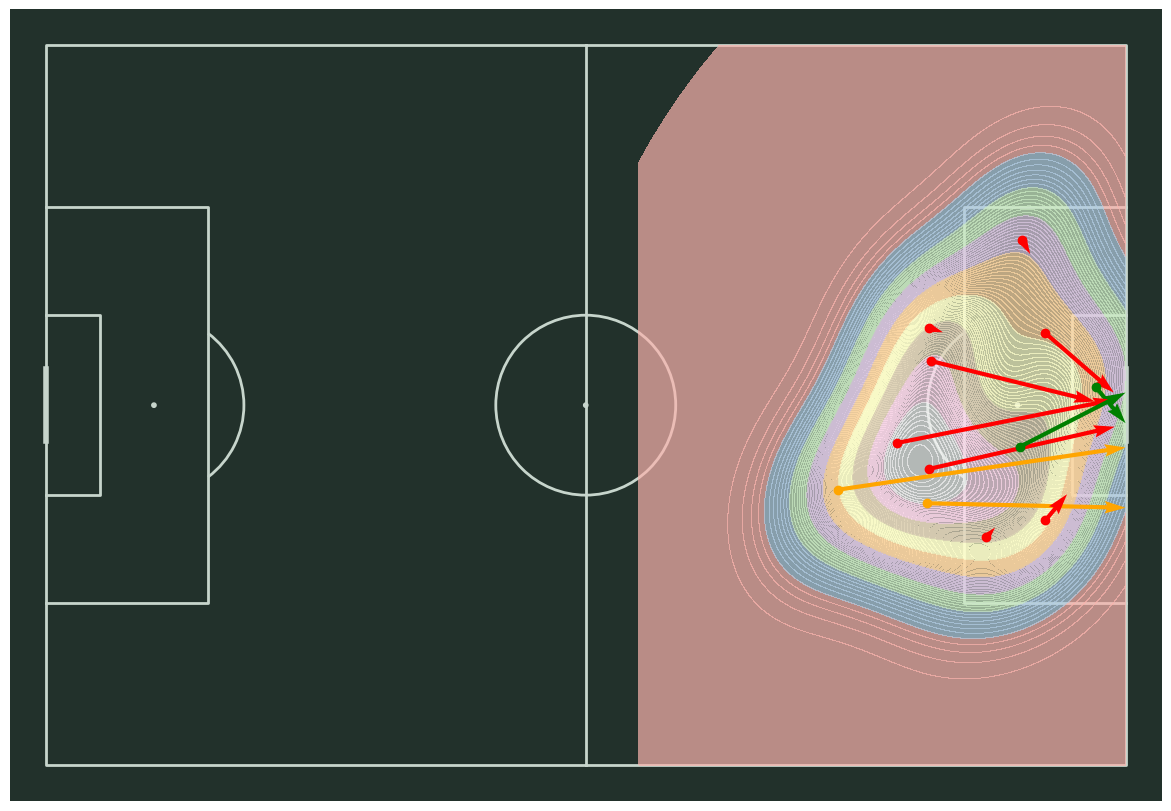

In [21]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(13.5, 8),constrained_layout=True, tight_layout=False)

kde = pitch.kdeplot(
    shots_Loc_South_Korea['x'],
    shots_Loc_South_Korea['y'], ax=ax,
    fill=True, levels=100,
    # shade the lowest area so it looks smooth
    # so even if there are no events it gets some color
    shade_lowest=True,
    thresh=0.05,
    alpha = 0.7,
    cut=4,  # extended the cut so it reaches the bottom edge
    cmap='Pastel1')


for i in range(len(shots_South_Korea)):
    if shots_South_Korea.shot_outcome[i]=='Goal':
        pitch.arrows(shots_South_Korea.location[i][0], shots_South_Korea.location[i][1], shots_South_Korea.shot_end_location[i][0], shots_South_Korea.shot_end_location[i][1], ax=ax, color='green', width=3)
        pitch.scatter(shots_South_Korea.location[i][0], shots_South_Korea.location[i][1], ax = ax, color='green', alpha=1)
    elif shots_South_Korea.shot_outcome[i] in ['Blocked', 'Saved']:
        pitch.arrows(shots_South_Korea.location[i][0], shots_South_Korea.location[i][1], shots_South_Korea.shot_end_location[i][0], shots_South_Korea.shot_end_location[i][1], ax=ax, color='red', width=3)
        pitch.scatter(shots_South_Korea.location[i][0], shots_South_Korea.location[i][1], ax = ax, color='red', alpha=1)
    else:
        pitch.arrows(shots_South_Korea.location[i][0], shots_South_Korea.location[i][1], shots_South_Korea.shot_end_location[i][0], shots_South_Korea.shot_end_location[i][1], ax=ax, color='orange', width=3)
        pitch.scatter(shots_South_Korea.location[i][0], shots_South_Korea.location[i][1], ax = ax, color='orange', alpha=1)

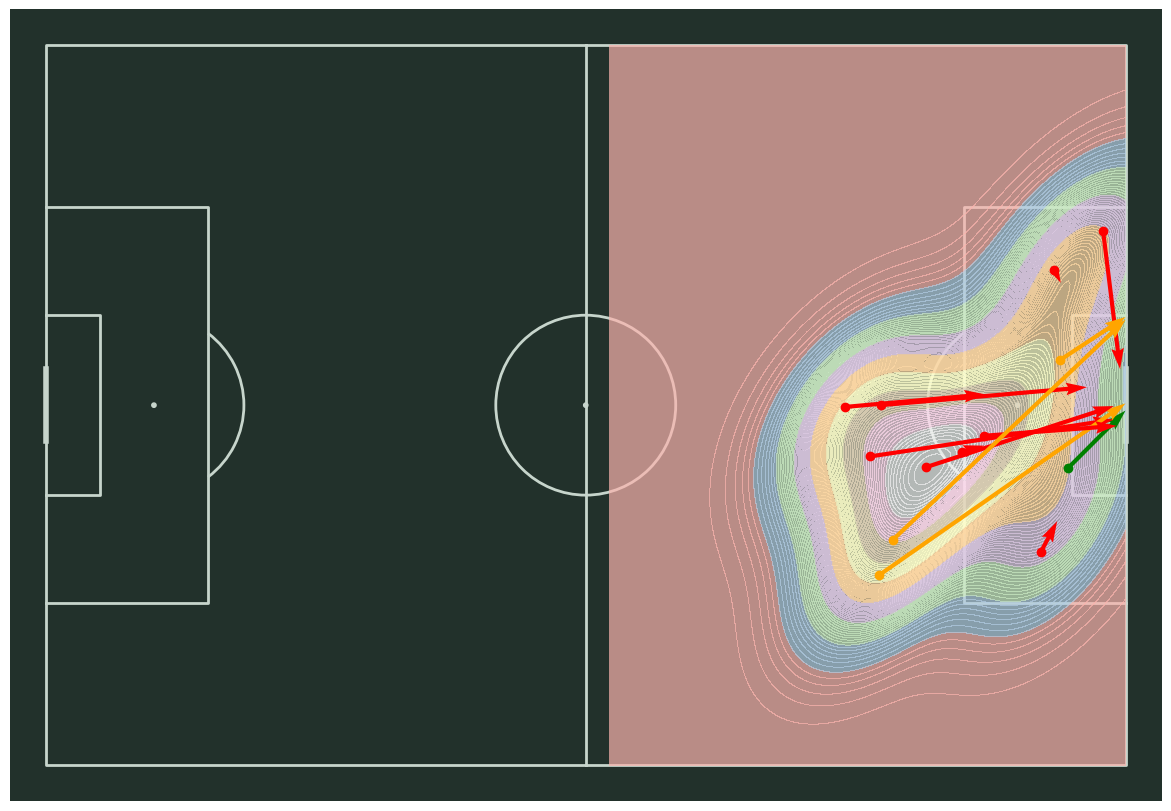

In [22]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(13.5, 8),constrained_layout=True, tight_layout=False)
#plt.gca().invert_yaxis()

kde = pitch.kdeplot(
    shots_Loc_Portugal['x'],
    shots_Loc_Portugal['y'], ax=ax,
    fill=True, levels=100,
    # shade the lowest area so it looks smooth
    # so even if there are no events it gets some color
    shade_lowest=True,
    thresh=0.05,
    alpha = 0.7,
    cut=4,  # extended the cut so it reaches the bottom edge
    cmap='Pastel1')

for i in range(len(shots_Portugal)):
    if shots_Portugal.shot_outcome[i]=='Goal':
        pitch.arrows(shots_Portugal.location[i][0], shots_Portugal.location[i][1], shots_Portugal.shot_end_location[i][0], shots_Portugal.shot_end_location[i][1], ax=ax, color='green', width=3)
        pitch.scatter(shots_Portugal.location[i][0], shots_Portugal.location[i][1], ax = ax, color='green', alpha=1)
    elif shots_Portugal.shot_outcome[i] in ['Blocked', 'Saved']:
        pitch.arrows(shots_Portugal.location[i][0], shots_Portugal.location[i][1], shots_Portugal.shot_end_location[i][0], shots_Portugal.shot_end_location[i][1], ax=ax, color='red', width=3)
        pitch.scatter(shots_Portugal.location[i][0], shots_Portugal.location[i][1], ax = ax, color='red', alpha=1)
    else:
        pitch.arrows(shots_Portugal.location[i][0], shots_Portugal.location[i][1], shots_Portugal.shot_end_location[i][0], shots_Portugal.shot_end_location[i][1], ax=ax, color='orange', width=3)
        pitch.scatter(shots_Portugal.location[i][0], shots_Portugal.location[i][1], ax = ax, color='orange', alpha=1)

### Pass Network Analysis

In [23]:
events.columns

Index(['bad_behaviour_card', 'ball_receipt_outcome', 'ball_recovery_offensive',
       'ball_recovery_recovery_failure', 'block_deflection',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_nutmeg', 'dribble_outcome', 'dribble_overrun',
       'duel_outcome', 'duel_type', 'duration', 'foul_committed_card',
       'foul_committed_type', 'foul_won_defensive', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'injury_stoppage_in_chain', 'interception_outcome', 'location',
       'match_id', 'minute', 'miscontrol_aerial_won', 'off_camera', 'out',
       'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_deflected',
       'pass_end_location', 'pass_goal_assist', 'pass_he

In [24]:
events_3 = events[['minute', 'second', 'team', 'location', 'period', 'type', 'pass_outcome', 'player', 'position', 'pass_end_location']]

In [25]:
events_3

minute  second         team location  period           type  \
0          0       0  South Korea      NaN       1    Starting XI   
1          0       0     Portugal      NaN       1    Starting XI   
2          0       0     Portugal      NaN       1     Half Start   
3          0       0  South Korea      NaN       1     Half Start   
4         45       0  South Korea      NaN       2     Half Start   
...      ...     ...          ...      ...     ...            ...   
3368      81      13  South Korea      NaN       2   Substitution   
3369      81      13     Portugal      NaN       2   Substitution   
3370      81      13     Portugal      NaN       2   Substitution   
3371      92      46  South Korea      NaN       2   Substitution   
3372      92      36  South Korea      NaN       2  Bad Behaviour   

     pass_outcome                             player               position  \
0             NaN                                NaN                    NaN   
1             NaN                                NaN                    NaN   
2             NaN                                NaN                    NaN   
3             NaN                                NaN                    NaN   
4             NaN                                NaN                    NaN   
...           ...                                ...                    ...   
3368          NaN                        Kang-In Lee   Left Center Midfield   
3369          NaN  João Mário Naval da Costa Eduardo  Right Center Midfield   
3370          NaN             Vitor Machado Ferreira   Left Center Midfield   
3371          NaN                       Gue-Sung Cho   Right Center Forward   
3372          NaN                     Hee-Chan Hwang          Left Midfield   

     pass_end_location  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  
...                ...  
3368               NaN  
3369               NaN  
3370               NaN  
3371               NaN  
3372               NaN  

[3373 rows x 10 columns]

In [26]:
events_3.type.unique()

array(['Starting XI', 'Half Start', 'Pass', 'Ball Receipt*', 'Carry',
       'Pressure', 'Ball Recovery', 'Foul Committed', 'Foul Won',
       'Miscontrol', 'Dribbled Past', 'Dribble', 'Duel', 'Goal Keeper',
       'Shot', 'Block', 'Clearance', 'Interception', 'Tactical Shift',
       'Dispossessed', 'Offside', 'Error', 'Injury Stoppage',
       'Referee Ball-Drop', 'Half End', 'Player Off', 'Player On',
       'Substitution', 'Bad Behaviour'], dtype=object)

In [27]:
events_3.pass_outcome.unique()

array([nan, 'Incomplete', 'Unknown', 'Out', 'Pass Offside'], dtype=object)

In [28]:
events_3.player.unique()

array([nan, 'Gue-Sung Cho', 'Woo-Young Jung', 'Young-Gwon Kim',
       'Jin-Su Kim', 'Heung-Min Son', 'Kang-In Lee', 'In-Beom Hwang',
       'Kyung-Won Kwon', 'Moon-Hwan Kim', 'Seung-Gyu Kim', 'Jae-Sung Lee',
       'João Pedro Cavaco Cancelo', 'Rúben Diogo Da Silva Neves',
       'José Diogo Dalot Teixeira',
       'António João Pereira Albuquerque Tavares Silva',
       'Vitor Machado Ferreira', 'Kléper Laveran Lima Ferreira',
       'João Mário Naval da Costa Eduardo',
       'Cristiano Ronaldo dos Santos Aveiro', 'Matheus Luiz Nunes',
       'Diogo Meireles Costa', 'Ricardo Jorge Luz Horta',
       'Hee-Chan Hwang', 'Rafael Alexandre Conceição Leão',
       'João Maria Lobo Alves Palhinha Gonçalves',
       'André Miguel Valente Silva', 'Jun-Ho Son',
       'William Silva de Carvalho',
       'Bernardo Mota Veiga de Carvalho e Silva', 'Ui-Jo Hwang',
       'Yu-Min Cho'], dtype=object)

In [29]:
# filter for South Korea
events_South_Korea = events_3[events_3['team']=='South Korea']
events_South_Korea

minute  second         team      location  period           type  \
0          0       0  South Korea           NaN       1    Starting XI   
3          0       0  South Korea           NaN       1     Half Start   
4         45       0  South Korea           NaN       2     Half Start   
6          0       0  South Korea  [60.0, 40.0]       1           Pass   
7          0       2  South Korea  [39.7, 30.0]       1           Pass   
...      ...     ...          ...           ...     ...            ...   
3366      65      23  South Korea           NaN       2   Substitution   
3367      80      31  South Korea           NaN       2   Substitution   
3368      81      13  South Korea           NaN       2   Substitution   
3371      92      46  South Korea           NaN       2   Substitution   
3372      92      36  South Korea           NaN       2  Bad Behaviour   

     pass_outcome          player                   position pass_end_location  
0             NaN             NaN                        NaN               NaN  
3             NaN             NaN                        NaN               NaN  
4             NaN             NaN                        NaN               NaN  
6             NaN    Gue-Sung Cho             Center Forward      [39.9, 29.0]  
7             NaN  Woo-Young Jung  Center Defensive Midfield      [31.9, 16.7]  
...           ...             ...                        ...               ...  
3366          NaN    Jae-Sung Lee                  Left Wing               NaN  
3367          NaN  Young-Gwon Kim           Left Center Back               NaN  
3368          NaN     Kang-In Lee       Left Center Midfield               NaN  
3371          NaN    Gue-Sung Cho       Right Center Forward               NaN  
3372          NaN  Hee-Chan Hwang              Left Midfield               NaN  

[1362 rows x 10 columns]

In [30]:
# Add the passer and the recipient columns
events_South_Korea['passer'] = events_South_Korea['player']
events_South_Korea['recipient'] = events_South_Korea['player'].shift(-1)

C:\Users\kwater\AppData\Local\Temp\ipykernel_10936\2685752392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_South_Korea['passer'] = events_South_Korea['player']
C:\Users\kwater\AppData\Local\Temp\ipykernel_10936\2685752392.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_South_Korea['recipient'] = events_South_Korea['player'].shift(-1)


In [31]:
events_South_Korea

minute  second         team      location  period           type  \
0          0       0  South Korea           NaN       1    Starting XI   
3          0       0  South Korea           NaN       1     Half Start   
4         45       0  South Korea           NaN       2     Half Start   
6          0       0  South Korea  [60.0, 40.0]       1           Pass   
7          0       2  South Korea  [39.7, 30.0]       1           Pass   
...      ...     ...          ...           ...     ...            ...   
3366      65      23  South Korea           NaN       2   Substitution   
3367      80      31  South Korea           NaN       2   Substitution   
3368      81      13  South Korea           NaN       2   Substitution   
3371      92      46  South Korea           NaN       2   Substitution   
3372      92      36  South Korea           NaN       2  Bad Behaviour   

     pass_outcome          player                   position  \
0             NaN             NaN                        NaN   
3             NaN             NaN                        NaN   
4             NaN             NaN                        NaN   
6             NaN    Gue-Sung Cho             Center Forward   
7             NaN  Woo-Young Jung  Center Defensive Midfield   
...           ...             ...                        ...   
3366          NaN    Jae-Sung Lee                  Left Wing   
3367          NaN  Young-Gwon Kim           Left Center Back   
3368          NaN     Kang-In Lee       Left Center Midfield   
3371          NaN    Gue-Sung Cho       Right Center Forward   
3372          NaN  Hee-Chan Hwang              Left Midfield   

     pass_end_location          passer       recipient  
0                  NaN             NaN             NaN  
3                  NaN             NaN             NaN  
4                  NaN             NaN    Gue-Sung Cho  
6         [39.9, 29.0]    Gue-Sung Cho  Woo-Young Jung  
7         [31.9, 16.7]  Woo-Young Jung  Young-Gwon Kim  
...                ...             ...             ...  
3366               NaN    Jae-Sung Lee  Young-Gwon Kim  
3367               NaN  Young-Gwon Kim     Kang-In Lee  
3368               NaN     Kang-In Lee    Gue-Sung Cho  
3371               NaN    Gue-Sung Cho  Hee-Chan Hwang  
3372               NaN  Hee-Chan Hwang            None  

[1362 rows x 12 columns]

In [32]:
#data frame with 'Pass' type
passes_South_Korea = events_South_Korea[events_South_Korea['type'] == 'Pass']
passes_South_Korea

minute  second         team      location  period  type pass_outcome  \
6          0       0  South Korea  [60.0, 40.0]       1  Pass          NaN   
7          0       2  South Korea  [39.7, 30.0]       1  Pass          NaN   
8          0       8  South Korea   [37.4, 8.9]       1  Pass          NaN   
9          0      11  South Korea   [42.1, 3.4]       1  Pass          NaN   
10         0      12  South Korea   [30.6, 4.1]       1  Pass          NaN   
...      ...     ...          ...           ...     ...   ...          ...   
1003      96       3  South Korea   [56.3, 3.7]       2  Pass          NaN   
1007      96      39  South Korea  [77.2, 80.0]       2  Pass          NaN   
1008      96      40  South Korea  [94.3, 76.4]       2  Pass          NaN   
1009      96      42  South Korea  [88.1, 78.2]       2  Pass          NaN   
1010      96      43  South Korea  [79.3, 75.4]       2  Pass   Incomplete   

              player                   position pass_end_location  \
6       Gue-Sung Cho             Center Forward      [39.9, 29.0]   
7     Woo-Young Jung  Center Defensive Midfield      [31.9, 16.7]   
8     Young-Gwon Kim           Left Center Back       [49.8, 3.6]   
9         Jin-Su Kim                  Left Back       [31.5, 3.6]   
10    Young-Gwon Kim           Left Center Back      [57.7, 11.7]   
...              ...                        ...               ...   
1003     Ui-Jo Hwang             Center Forward      [63.5, 15.6]   
1007   Moon-Hwan Kim            Right Wing Back      [94.3, 76.4]   
1008     Ui-Jo Hwang             Center Forward      [89.5, 78.9]   
1009   Heung-Min Son                 Right Wing      [79.6, 76.2]   
1010   Moon-Hwan Kim            Right Wing Back      [81.9, 72.3]   

              passer       recipient  
6       Gue-Sung Cho  Woo-Young Jung  
7     Woo-Young Jung  Young-Gwon Kim  
8     Young-Gwon Kim      Jin-Su Kim  
9         Jin-Su Kim  Young-Gwon Kim  
10    Young-Gwon Kim   Heung-Min Son  
...              ...             ...  
1003     Ui-Jo Hwang   Moon-Hwan Kim  
1007   Moon-Hwan Kim     Ui-Jo Hwang  
1008     Ui-Jo Hwang   Heung-Min Son  
1009   Heung-Min Son   Moon-Hwan Kim  
1010   Moon-Hwan Kim  Woo-Young Jung  

[388 rows x 12 columns]

In [33]:
# Successful passes
successful_South_Korea = passes_South_Korea[passes_South_Korea['pass_outcome'].isnull()]
successful_South_Korea

minute  second         team      location  period  type pass_outcome  \
6          0       0  South Korea  [60.0, 40.0]       1  Pass          NaN   
7          0       2  South Korea  [39.7, 30.0]       1  Pass          NaN   
8          0       8  South Korea   [37.4, 8.9]       1  Pass          NaN   
9          0      11  South Korea   [42.1, 3.4]       1  Pass          NaN   
10         0      12  South Korea   [30.6, 4.1]       1  Pass          NaN   
...      ...     ...          ...           ...     ...   ...          ...   
1002      96       1  South Korea   [26.4, 0.1]       2  Pass          NaN   
1003      96       3  South Korea   [56.3, 3.7]       2  Pass          NaN   
1007      96      39  South Korea  [77.2, 80.0]       2  Pass          NaN   
1008      96      40  South Korea  [94.3, 76.4]       2  Pass          NaN   
1009      96      42  South Korea  [88.1, 78.2]       2  Pass          NaN   

              player                   position pass_end_location  \
6       Gue-Sung Cho             Center Forward      [39.9, 29.0]   
7     Woo-Young Jung  Center Defensive Midfield      [31.9, 16.7]   
8     Young-Gwon Kim           Left Center Back       [49.8, 3.6]   
9         Jin-Su Kim                  Left Back       [31.5, 3.6]   
10    Young-Gwon Kim           Left Center Back      [57.7, 11.7]   
...              ...                        ...               ...   
1002      Jin-Su Kim             Left Wing Back       [55.3, 3.4]   
1003     Ui-Jo Hwang             Center Forward      [63.5, 15.6]   
1007   Moon-Hwan Kim            Right Wing Back      [94.3, 76.4]   
1008     Ui-Jo Hwang             Center Forward      [89.5, 78.9]   
1009   Heung-Min Son                 Right Wing      [79.6, 76.2]   

              passer       recipient  
6       Gue-Sung Cho  Woo-Young Jung  
7     Woo-Young Jung  Young-Gwon Kim  
8     Young-Gwon Kim      Jin-Su Kim  
9         Jin-Su Kim  Young-Gwon Kim  
10    Young-Gwon Kim   Heung-Min Son  
...              ...             ...  
1002      Jin-Su Kim     Ui-Jo Hwang  
1003     Ui-Jo Hwang   Moon-Hwan Kim  
1007   Moon-Hwan Kim     Ui-Jo Hwang  
1008     Ui-Jo Hwang   Heung-Min Son  
1009   Heung-Min Son   Moon-Hwan Kim  

[309 rows x 12 columns]

In [34]:
# Check whether no NaNs are present
sum(successful_South_Korea.recipient.isnull()+1)

309

In [35]:
# Pass network before the first substitution takes place
subs_South_Korea = events_South_Korea[events_South_Korea['type']=='Substitution']
subs_South_Korea

minute  second         team location  period          type pass_outcome  \
3366      65      23  South Korea      NaN       2  Substitution          NaN   
3367      80      31  South Korea      NaN       2  Substitution          NaN   
3368      81      13  South Korea      NaN       2  Substitution          NaN   
3371      92      46  South Korea      NaN       2  Substitution          NaN   

              player              position pass_end_location          passer  \
3366    Jae-Sung Lee             Left Wing               NaN    Jae-Sung Lee   
3367  Young-Gwon Kim      Left Center Back               NaN  Young-Gwon Kim   
3368     Kang-In Lee  Left Center Midfield               NaN     Kang-In Lee   
3371    Gue-Sung Cho  Right Center Forward               NaN    Gue-Sung Cho   

           recipient  
3366  Young-Gwon Kim  
3367     Kang-In Lee  
3368    Gue-Sung Cho  
3371  Hee-Chan Hwang

In [36]:
# Time when the first substituion took place
first_sub_South_Korea_minute = subs_South_Korea['minute'].min()
first_sub_South_Korea_minute_df = subs_South_Korea[subs_South_Korea['minute'] == first_sub_South_Korea_minute]
first_sub_South_Korea_second = first_sub_South_Korea_minute_df['second'].min()
first_sub_South_Korea_minute, first_sub_South_Korea_second

(65, 23)

In [37]:
# Filter oute the data for generating pass network before the first substitution takes place
successful_South_Korea = successful_South_Korea[(successful_South_Korea['minute']<=first_sub_South_Korea_minute) & (successful_South_Korea['second']<first_sub_South_Korea_second)]
successful_South_Korea

minute  second         team      location  period  type pass_outcome  \
6         0       0  South Korea  [60.0, 40.0]       1  Pass          NaN   
7         0       2  South Korea  [39.7, 30.0]       1  Pass          NaN   
8         0       8  South Korea   [37.4, 8.9]       1  Pass          NaN   
9         0      11  South Korea   [42.1, 3.4]       1  Pass          NaN   
10        0      12  South Korea   [30.6, 4.1]       1  Pass          NaN   
..      ...     ...          ...           ...     ...   ...          ...   
646      54      17  South Korea  [39.6, 78.5]       2  Pass          NaN   
647      54      19  South Korea  [27.1, 60.3]       2  Pass          NaN   
660      55      21  South Korea  [24.3, 15.8]       2  Pass          NaN   
661      55      22  South Korea  [35.2, 22.5]       2  Pass          NaN   
740      63      13  South Korea  [39.1, 80.0]       2  Pass          NaN   

             player                   position pass_end_location  \
6      Gue-Sung Cho             Center Forward      [39.9, 29.0]   
7    Woo-Young Jung  Center Defensive Midfield      [31.9, 16.7]   
8    Young-Gwon Kim           Left Center Back       [49.8, 3.6]   
9        Jin-Su Kim                  Left Back       [31.5, 3.6]   
10   Young-Gwon Kim           Left Center Back      [57.7, 11.7]   
..              ...                        ...               ...   
646  Kyung-Won Kwon          Right Center Back      [29.9, 61.3]   
647   In-Beom Hwang      Right Center Midfield       [5.9, 43.7]   
660    Jae-Sung Lee                  Left Wing      [35.2, 22.5]   
661    Gue-Sung Cho             Center Forward      [30.7, 26.3]   
740   Moon-Hwan Kim                 Right Back      [62.9, 75.1]   

             passer       recipient  
6      Gue-Sung Cho  Woo-Young Jung  
7    Woo-Young Jung  Young-Gwon Kim  
8    Young-Gwon Kim      Jin-Su Kim  
9        Jin-Su Kim  Young-Gwon Kim  
10   Young-Gwon Kim   Heung-Min Son  
..              ...             ...  
646  Kyung-Won Kwon   In-Beom Hwang  
647   In-Beom Hwang   Seung-Gyu Kim  
660    Jae-Sung Lee    Gue-Sung Cho  
661    Gue-Sung Cho     Kang-In Lee  
740   Moon-Hwan Kim    Gue-Sung Cho  

[112 rows x 12 columns]

In [38]:
pass_loc_South_Korea = successful_South_Korea['location']
pass_loc_South_Korea = pd.DataFrame(pass_loc_South_Korea.to_list(), columns=['x', 'y'])
pass_end_loc_South_Korea = successful_South_Korea['pass_end_location']
pass_end_loc_South_Korea = pd.DataFrame(pass_end_loc_South_Korea.to_list(), columns=['end_x', 'end_y'])
pass_end_loc_South_Korea

end_x  end_y
0     39.9   29.0
1     31.9   16.7
2     49.8    3.6
3     31.5    3.6
4     57.7   11.7
..     ...    ...
107   29.9   61.3
108    5.9   43.7
109   35.2   22.5
110   30.7   26.3
111   62.9   75.1

[112 rows x 2 columns]

In [39]:
successful_South_Korea=successful_South_Korea.reset_index()
successful_South_Korea['x'] = pass_loc_South_Korea['x']
successful_South_Korea['y'] = pass_loc_South_Korea['y']
successful_South_Korea['end_x'] = pass_end_loc_South_Korea['end_x']
successful_South_Korea['end_y'] = pass_end_loc_South_Korea['end_y']
successful_South_Korea

index  minute  second         team      location  period  type  \
0        6       0       0  South Korea  [60.0, 40.0]       1  Pass   
1        7       0       2  South Korea  [39.7, 30.0]       1  Pass   
2        8       0       8  South Korea   [37.4, 8.9]       1  Pass   
3        9       0      11  South Korea   [42.1, 3.4]       1  Pass   
4       10       0      12  South Korea   [30.6, 4.1]       1  Pass   
..     ...     ...     ...          ...           ...     ...   ...   
107    646      54      17  South Korea  [39.6, 78.5]       2  Pass   
108    647      54      19  South Korea  [27.1, 60.3]       2  Pass   
109    660      55      21  South Korea  [24.3, 15.8]       2  Pass   
110    661      55      22  South Korea  [35.2, 22.5]       2  Pass   
111    740      63      13  South Korea  [39.1, 80.0]       2  Pass   

    pass_outcome          player                   position pass_end_location  \
0            NaN    Gue-Sung Cho             Center Forward      [39.9, 29.0]   
1            NaN  Woo-Young Jung  Center Defensive Midfield      [31.9, 16.7]   
2            NaN  Young-Gwon Kim           Left Center Back       [49.8, 3.6]   
3            NaN      Jin-Su Kim                  Left Back       [31.5, 3.6]   
4            NaN  Young-Gwon Kim           Left Center Back      [57.7, 11.7]   
..           ...             ...                        ...               ...   
107          NaN  Kyung-Won Kwon          Right Center Back      [29.9, 61.3]   
108          NaN   In-Beom Hwang      Right Center Midfield       [5.9, 43.7]   
109          NaN    Jae-Sung Lee                  Left Wing      [35.2, 22.5]   
110          NaN    Gue-Sung Cho             Center Forward      [30.7, 26.3]   
111          NaN   Moon-Hwan Kim                 Right Back      [62.9, 75.1]   

             passer       recipient     x     y  end_x  end_y  
0      Gue-Sung Cho  Woo-Young Jung  60.0  40.0   39.9   29.0  
1    Woo-Young Jung  Young-Gwon Kim  39.7  30.0   31.9   16.7  
2    Young-Gwon Kim      Jin-Su Kim  37.4   8.9   49.8    3.6  
3        Jin-Su Kim  Young-Gwon Kim  42.1   3.4   31.5    3.6  
4    Young-Gwon Kim   Heung-Min Son  30.6   4.1   57.7   11.7  
..              ...             ...   ...   ...    ...    ...  
107  Kyung-Won Kwon   In-Beom Hwang  39.6  78.5   29.9   61.3  
108   In-Beom Hwang   Seung-Gyu Kim  27.1  60.3    5.9   43.7  
109    Jae-Sung Lee    Gue-Sung Cho  24.3  15.8   35.2   22.5  
110    Gue-Sung Cho     Kang-In Lee  35.2  22.5   30.7   26.3  
111   Moon-Hwan Kim    Gue-Sung Cho  39.1  80.0   62.9   75.1  

[112 rows x 17 columns]

In [40]:
del successful_South_Korea['location']
del successful_South_Korea['pass_end_location']
successful_South_Korea

index  minute  second         team  period  type pass_outcome  \
0        6       0       0  South Korea       1  Pass          NaN   
1        7       0       2  South Korea       1  Pass          NaN   
2        8       0       8  South Korea       1  Pass          NaN   
3        9       0      11  South Korea       1  Pass          NaN   
4       10       0      12  South Korea       1  Pass          NaN   
..     ...     ...     ...          ...     ...   ...          ...   
107    646      54      17  South Korea       2  Pass          NaN   
108    647      54      19  South Korea       2  Pass          NaN   
109    660      55      21  South Korea       2  Pass          NaN   
110    661      55      22  South Korea       2  Pass          NaN   
111    740      63      13  South Korea       2  Pass          NaN   

             player                   position          passer  \
0      Gue-Sung Cho             Center Forward    Gue-Sung Cho   
1    Woo-Young Jung  Center Defensive Midfield  Woo-Young Jung   
2    Young-Gwon Kim           Left Center Back  Young-Gwon Kim   
3        Jin-Su Kim                  Left Back      Jin-Su Kim   
4    Young-Gwon Kim           Left Center Back  Young-Gwon Kim   
..              ...                        ...             ...   
107  Kyung-Won Kwon          Right Center Back  Kyung-Won Kwon   
108   In-Beom Hwang      Right Center Midfield   In-Beom Hwang   
109    Jae-Sung Lee                  Left Wing    Jae-Sung Lee   
110    Gue-Sung Cho             Center Forward    Gue-Sung Cho   
111   Moon-Hwan Kim                 Right Back   Moon-Hwan Kim   

          recipient     x     y  end_x  end_y  
0    Woo-Young Jung  60.0  40.0   39.9   29.0  
1    Young-Gwon Kim  39.7  30.0   31.9   16.7  
2        Jin-Su Kim  37.4   8.9   49.8    3.6  
3    Young-Gwon Kim  42.1   3.4   31.5    3.6  
4     Heung-Min Son  30.6   4.1   57.7   11.7  
..              ...   ...   ...    ...    ...  
107   In-Beom Hwang  39.6  78.5   29.9   61.3  
108   Seung-Gyu Kim  27.1  60.3    5.9   43.7  
109    Gue-Sung Cho  24.3  15.8   35.2   22.5  
110     Kang-In Lee  35.2  22.5   30.7   26.3  
111    Gue-Sung Cho  39.1  80.0   62.9   75.1  

[112 rows x 15 columns]

In [41]:
successful_South_Korea['pass_outcome'] = 'successful'
successful_South_Korea

index  minute  second         team  period  type pass_outcome  \
0        6       0       0  South Korea       1  Pass   successful   
1        7       0       2  South Korea       1  Pass   successful   
2        8       0       8  South Korea       1  Pass   successful   
3        9       0      11  South Korea       1  Pass   successful   
4       10       0      12  South Korea       1  Pass   successful   
..     ...     ...     ...          ...     ...   ...          ...   
107    646      54      17  South Korea       2  Pass   successful   
108    647      54      19  South Korea       2  Pass   successful   
109    660      55      21  South Korea       2  Pass   successful   
110    661      55      22  South Korea       2  Pass   successful   
111    740      63      13  South Korea       2  Pass   successful   

             player                   position          passer  \
0      Gue-Sung Cho             Center Forward    Gue-Sung Cho   
1    Woo-Young Jung  Center Defensive Midfield  Woo-Young Jung   
2    Young-Gwon Kim           Left Center Back  Young-Gwon Kim   
3        Jin-Su Kim                  Left Back      Jin-Su Kim   
4    Young-Gwon Kim           Left Center Back  Young-Gwon Kim   
..              ...                        ...             ...   
107  Kyung-Won Kwon          Right Center Back  Kyung-Won Kwon   
108   In-Beom Hwang      Right Center Midfield   In-Beom Hwang   
109    Jae-Sung Lee                  Left Wing    Jae-Sung Lee   
110    Gue-Sung Cho             Center Forward    Gue-Sung Cho   
111   Moon-Hwan Kim                 Right Back   Moon-Hwan Kim   

          recipient     x     y  end_x  end_y  
0    Woo-Young Jung  60.0  40.0   39.9   29.0  
1    Young-Gwon Kim  39.7  30.0   31.9   16.7  
2        Jin-Su Kim  37.4   8.9   49.8    3.6  
3    Young-Gwon Kim  42.1   3.4   31.5    3.6  
4     Heung-Min Son  30.6   4.1   57.7   11.7  
..              ...   ...   ...    ...    ...  
107   In-Beom Hwang  39.6  78.5   29.9   61.3  
108   Seung-Gyu Kim  27.1  60.3    5.9   43.7  
109    Gue-Sung Cho  24.3  15.8   35.2   22.5  
110     Kang-In Lee  35.2  22.5   30.7   26.3  
111    Gue-Sung Cho  39.1  80.0   62.9   75.1  

[112 rows x 15 columns]

In [42]:
# find the average locations of the passer
avg_loc_South_Korea = successful_South_Korea.groupby('passer').agg({'x':['mean'], 'y': ['mean', 'count']})
avg_loc_South_Korea

x          y      
                     mean       mean count
passer                                    
Gue-Sung Cho    80.671429  36.100000     7
Heung-Min Son   98.616667  16.916667     6
In-Beom Hwang   56.100000  52.690000    10
Jae-Sung Lee    76.171429  44.785714     7
Jin-Su Kim      69.825000   7.183333    12
Kang-In Lee     66.000000  21.657143     7
Kyung-Won Kwon  39.300000  57.930000    10
Moon-Hwan Kim   69.560000  75.190000    10
Seung-Gyu Kim   19.200000  35.528571     7
Woo-Young Jung  51.082353  24.635294    17
Young-Gwon Kim  39.105263  10.378947    19

In [43]:
avg_loc_South_Korea.columns=['x', 'y', 'count']
avg_loc_South_Korea

x          y  count
passer                                     
Gue-Sung Cho    80.671429  36.100000      7
Heung-Min Son   98.616667  16.916667      6
In-Beom Hwang   56.100000  52.690000     10
Jae-Sung Lee    76.171429  44.785714      7
Jin-Su Kim      69.825000   7.183333     12
Kang-In Lee     66.000000  21.657143      7
Kyung-Won Kwon  39.300000  57.930000     10
Moon-Hwan Kim   69.560000  75.190000     10
Seung-Gyu Kim   19.200000  35.528571      7
Woo-Young Jung  51.082353  24.635294     17
Young-Gwon Kim  39.105263  10.378947     19

In [44]:
Cho = successful_South_Korea[successful_South_Korea['player'] == 'Gue-Sung Cho']
len(Cho)

7

In [45]:
# Number of passes between each player
pass_bet_South_Korea = successful_South_Korea.groupby(['passer', 'recipient']).index.count().reset_index()
pass_bet_South_Korea

passer       recipient  index
0     Gue-Sung Cho   In-Beom Hwang      1
1     Gue-Sung Cho    Jae-Sung Lee      1
2     Gue-Sung Cho      Jin-Su Kim      2
3     Gue-Sung Cho     Kang-In Lee      1
4     Gue-Sung Cho   Moon-Hwan Kim      1
..             ...             ...    ...
62  Young-Gwon Kim     Kang-In Lee      2
63  Young-Gwon Kim  Kyung-Won Kwon      2
64  Young-Gwon Kim   Moon-Hwan Kim      1
65  Young-Gwon Kim   Seung-Gyu Kim      1
66  Young-Gwon Kim  Woo-Young Jung      6

[67 rows x 3 columns]

In [46]:
pass_bet_South_Korea.rename({'index':'pass_count'}, axis='columns', inplace=True)
pass_bet_South_Korea

passer       recipient  pass_count
0     Gue-Sung Cho   In-Beom Hwang           1
1     Gue-Sung Cho    Jae-Sung Lee           1
2     Gue-Sung Cho      Jin-Su Kim           2
3     Gue-Sung Cho     Kang-In Lee           1
4     Gue-Sung Cho   Moon-Hwan Kim           1
..             ...             ...         ...
62  Young-Gwon Kim     Kang-In Lee           2
63  Young-Gwon Kim  Kyung-Won Kwon           2
64  Young-Gwon Kim   Moon-Hwan Kim           1
65  Young-Gwon Kim   Seung-Gyu Kim           1
66  Young-Gwon Kim  Woo-Young Jung           6

[67 rows x 3 columns]

In [47]:
pass_bet_South_Korea = pass_bet_South_Korea.merge(avg_loc_South_Korea, left_on = 'passer', right_index=True)
pass_bet_South_Korea

passer       recipient  pass_count          x          y  count
0     Gue-Sung Cho   In-Beom Hwang           1  80.671429  36.100000      7
1     Gue-Sung Cho    Jae-Sung Lee           1  80.671429  36.100000      7
2     Gue-Sung Cho      Jin-Su Kim           2  80.671429  36.100000      7
3     Gue-Sung Cho     Kang-In Lee           1  80.671429  36.100000      7
4     Gue-Sung Cho   Moon-Hwan Kim           1  80.671429  36.100000      7
..             ...             ...         ...        ...        ...    ...
62  Young-Gwon Kim     Kang-In Lee           2  39.105263  10.378947     19
63  Young-Gwon Kim  Kyung-Won Kwon           2  39.105263  10.378947     19
64  Young-Gwon Kim   Moon-Hwan Kim           1  39.105263  10.378947     19
65  Young-Gwon Kim   Seung-Gyu Kim           1  39.105263  10.378947     19
66  Young-Gwon Kim  Woo-Young Jung           6  39.105263  10.378947     19

[67 rows x 6 columns]

In [48]:
pass_bet_South_Korea = pass_bet_South_Korea.merge(avg_loc_South_Korea, left_on = 'recipient', right_index=True, suffixes=['', '_end'])
pass_bet_South_Korea

passer      recipient  pass_count          x          y  count  \
0     Gue-Sung Cho  In-Beom Hwang           1  80.671429  36.100000      7   
19    Jae-Sung Lee  In-Beom Hwang           2  76.171429  44.785714      7   
33  Kyung-Won Kwon  In-Beom Hwang           4  39.300000  57.930000     10   
39   Moon-Hwan Kim  In-Beom Hwang           2  69.560000  75.190000     10   
49  Woo-Young Jung  In-Beom Hwang           2  51.082353  24.635294     17   
..             ...            ...         ...        ...        ...    ...   
22      Jin-Su Kim   Gue-Sung Cho           1  69.825000   7.183333     12   
38   Moon-Hwan Kim   Gue-Sung Cho           2  69.560000  75.190000     10   
45   Seung-Gyu Kim   Gue-Sung Cho           3  19.200000  35.528571      7   
48  Woo-Young Jung   Gue-Sung Cho           1  51.082353  24.635294     17   
57  Young-Gwon Kim   Gue-Sung Cho           1  39.105263  10.378947     19   

        x_end  y_end  count_end  
0   56.100000  52.69         10  
19  56.100000  52.69         10  
33  56.100000  52.69         10  
39  56.100000  52.69         10  
49  56.100000  52.69         10  
..        ...    ...        ...  
22  80.671429  36.10          7  
38  80.671429  36.10          7  
45  80.671429  36.10          7  
48  80.671429  36.10          7  
57  80.671429  36.10          7  

[67 rows x 9 columns]

Text(0.5, 1.0, 'Pass Network of South Korea against Portugal on 2022 FIFA World Cup (South Korea 2-1 Portugal)')

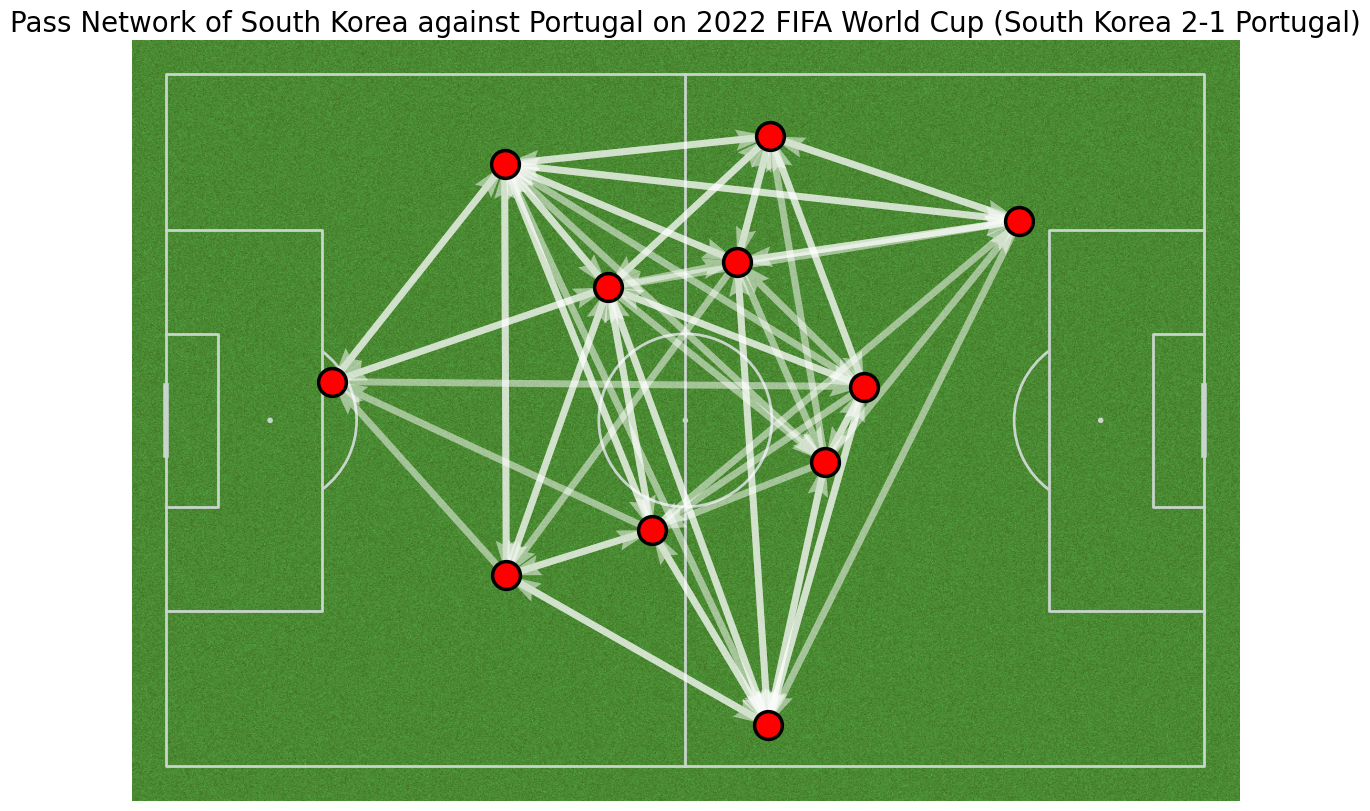

In [49]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='grass', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(13.5, 8), constrained_layout=True, tight_layout=False)

arrows = pitch.arrows(pass_bet_South_Korea.x, pass_bet_South_Korea.y, pass_bet_South_Korea.x_end, pass_bet_South_Korea.y_end, ax=ax, width=5,
                     headwidth=3, color='white', zorder=1, alpha=0.5)
nodes = pitch.scatter(avg_loc_South_Korea.x, avg_loc_South_Korea.y, s=400, color='red', edgecolors='black', linewidth=2.5, alpha=1, zorder=1, ax=ax)

ax.set_title('Pass Network of South Korea against Portugal on 2022 FIFA World Cup (South Korea 2-1 Portugal)', size=20)

In [50]:
graph_South_Korea = pass_bet_South_Korea[['passer', 'recipient', 'pass_count']]
graph_South_Korea

passer      recipient  pass_count
0     Gue-Sung Cho  In-Beom Hwang           1
19    Jae-Sung Lee  In-Beom Hwang           2
33  Kyung-Won Kwon  In-Beom Hwang           4
39   Moon-Hwan Kim  In-Beom Hwang           2
49  Woo-Young Jung  In-Beom Hwang           2
..             ...            ...         ...
22      Jin-Su Kim   Gue-Sung Cho           1
38   Moon-Hwan Kim   Gue-Sung Cho           2
45   Seung-Gyu Kim   Gue-Sung Cho           3
48  Woo-Young Jung   Gue-Sung Cho           1
57  Young-Gwon Kim   Gue-Sung Cho           1

[67 rows x 3 columns]

In [51]:
graph_South_Korea.passer.unique()

array(['Gue-Sung Cho', 'Jae-Sung Lee', 'Kyung-Won Kwon', 'Moon-Hwan Kim',
       'Woo-Young Jung', 'Young-Gwon Kim', 'Kang-In Lee', 'Heung-Min Son',
       'Jin-Su Kim', 'In-Beom Hwang', 'Seung-Gyu Kim'], dtype=object)

In [52]:
player_number_dict = {'Gue-Sung Cho': 9, 'Heung-Min Son': 7, 'In-Beom Hwang': 6, 'Jae-Sung Lee': 10,
                      'Jin-Su Kim': 3, 'Kang-In Lee': 18, 'Kyung-Won Kwon': 20, 'Moon-Hwan Kim': 15, 
                      'Seung-Gyu Kim': 1, 'Woo-Young Jung': 5, 'Young-Gwon Kim': 19}
graph_South_Korea['passer'] = graph_South_Korea.passer.map(player_number_dict)
graph_South_Korea['recipient'] = graph_South_Korea.recipient.map(player_number_dict)

C:\Users\kwater\AppData\Local\Temp\ipykernel_10936\521229592.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_South_Korea['passer'] = graph_South_Korea.passer.map(player_number_dict)
C:\Users\kwater\AppData\Local\Temp\ipykernel_10936\521229592.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_South_Korea['recipient'] = graph_South_Korea.recipient.map(player_number_dict)


In [53]:
graph_South_Korea

passer  recipient  pass_count
0        9          6           1
19      10          6           2
33      20          6           4
39      15          6           2
49       5          6           2
..     ...        ...         ...
22       3          9           1
38      15          9           2
45       1          9           3
48       5          9           1
57      19          9           1

[67 rows x 3 columns]

In [54]:
# convert the dataframe to a list of tuples
L = graph_South_Korea.apply(tuple, axis=1).tolist()
L

[(9, 6, 1),
 (10, 6, 2),
 (20, 6, 4),
 (15, 6, 2),
 (5, 6, 2),
 (19, 6, 1),
 (9, 10, 1),
 (18, 10, 1),
 (15, 10, 2),
 (5, 10, 1),
 (19, 10, 1),
 (9, 3, 2),
 (7, 3, 1),
 (10, 3, 1),
 (18, 3, 1),
 (5, 3, 2),
 (19, 3, 3),
 (9, 18, 1),
 (7, 18, 2),
 (3, 18, 1),
 (15, 18, 1),
 (5, 18, 3),
 (19, 18, 2),
 (9, 15, 1),
 (7, 15, 1),
 (6, 15, 2),
 (10, 15, 2),
 (18, 15, 1),
 (20, 15, 1),
 (15, 15, 1),
 (5, 15, 1),
 (19, 15, 1),
 (9, 5, 1),
 (7, 5, 1),
 (6, 5, 2),
 (3, 5, 5),
 (20, 5, 1),
 (15, 5, 1),
 (1, 5, 1),
 (19, 5, 6),
 (7, 19, 1),
 (6, 19, 1),
 (3, 19, 3),
 (18, 19, 2),
 (20, 19, 2),
 (1, 19, 3),
 (5, 19, 4),
 (6, 7, 1),
 (10, 7, 1),
 (3, 7, 2),
 (18, 7, 1),
 (19, 7, 1),
 (6, 20, 3),
 (18, 20, 1),
 (15, 20, 1),
 (5, 20, 2),
 (19, 20, 2),
 (6, 1, 1),
 (20, 1, 2),
 (5, 1, 1),
 (19, 1, 1),
 (10, 9, 1),
 (3, 9, 1),
 (15, 9, 2),
 (1, 9, 3),
 (5, 9, 1),
 (19, 9, 1)]

# Apply Networkx 

# Draw the NetworkX graph using Pass Data

In [78]:
nx.algorithms

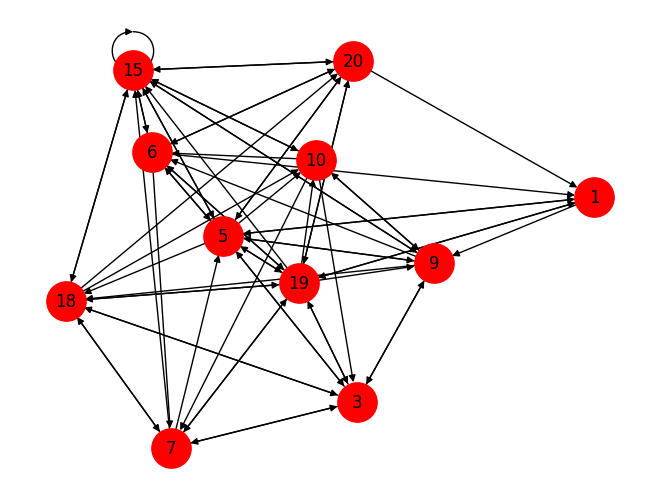

In [55]:
# Create Object using DiGraph (Directed Network)
G = nx.DiGraph()
G.add_weighted_edges_from(L)
nx.draw(G, node_size=800, with_labels=True, node_color='red')

# Count Degree (the number of link, the number of pass) for each player

In [56]:
# Vertex degrees, the number of link
dict(nx.degree(G))

{9: 12,
 6: 12,
 10: 10,
 20: 10,
 15: 16,
 5: 17,
 19: 17,
 18: 12,
 3: 11,
 7: 10,
 1: 7}

In [57]:
# Node별 전체 연결수 (선수별 전체 연결수)

Text(0.5, 1.0, 'Successful passes (degrees) of each player (vertex)')

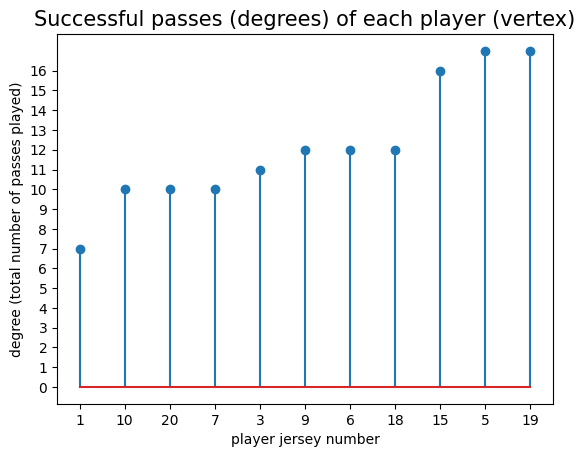

In [58]:
dic = dict(nx.degree(G))
player = dic.keys()
degrees = dic.values()
degree_South_Korea = pd.DataFrame({'player':player, 'degrees':degrees})

ordered = degree_South_Korea.sort_values(by = 'degrees')
x_range = range(len(degree_South_Korea.index))
y_range = range(math.ceil(max(degree_South_Korea.degrees)))


plt.stem(ordered['degrees'])
plt.xticks(x_range, ordered['player'])
plt.yticks(y_range)
plt.xlabel("player jersey number")
plt.ylabel("degree (total number of passes played)")
plt.title("Successful passes (degrees) of each player (vertex)", size=15)

In [59]:
G.in_degree()

InDegreeView({9: 6, 6: 6, 10: 5, 20: 5, 15: 9, 5: 8, 19: 7, 18: 6, 3: 6, 7: 5, 1: 4})

In [60]:
nx.degree(G)

DiDegreeView({9: 12, 6: 12, 10: 10, 20: 10, 15: 16, 5: 17, 19: 17, 18: 12, 3: 11, 7: 10, 1: 7})

In [61]:
G.out_degree()

OutDegreeView({9: 6, 6: 6, 10: 5, 20: 5, 15: 7, 5: 9, 19: 10, 18: 6, 3: 5, 7: 5, 1: 3})

In [62]:
# Node별 들어오는 연결수 (선수별 받은 패스의 연결수)

Text(0.5, 1.0, 'Successful passes received (indegrees) for each player (vertex)')

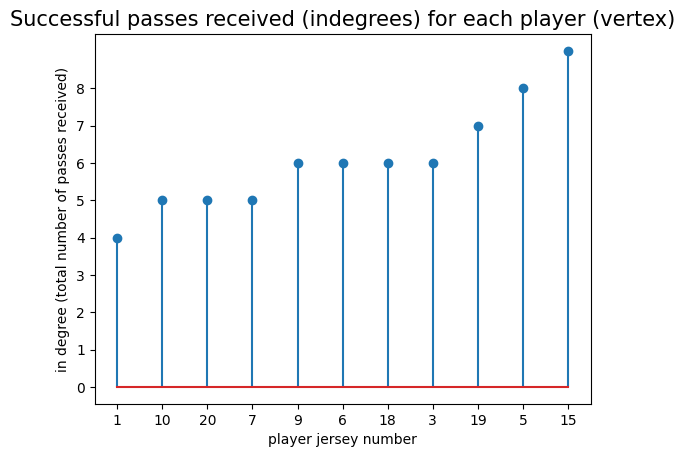

In [63]:
dic = dict(G.in_degree())
player = dic.keys()
in_degrees = dic.values()
in_degree_South_Korea = pd.DataFrame({'player':player, 'in_degrees':in_degrees})

ordered = in_degree_South_Korea.sort_values(by = 'in_degrees')
x_range = range(len(in_degree_South_Korea.index))
y_range = range(math.ceil(max(in_degree_South_Korea.in_degrees)))


plt.stem(ordered['in_degrees'])
plt.xticks(x_range, ordered['player'])
plt.yticks(y_range)
plt.xlabel("player jersey number")
plt.ylabel("in degree (total number of passes received)")
plt.title("Successful passes received (indegrees) for each player (vertex)", size=15)

In [64]:
# Node별 나가는 연결수 (선수별 보낸 패스의 연결수)

Text(0.5, 1.0, 'Successful passes given (indegrees) by each player (vertex)')

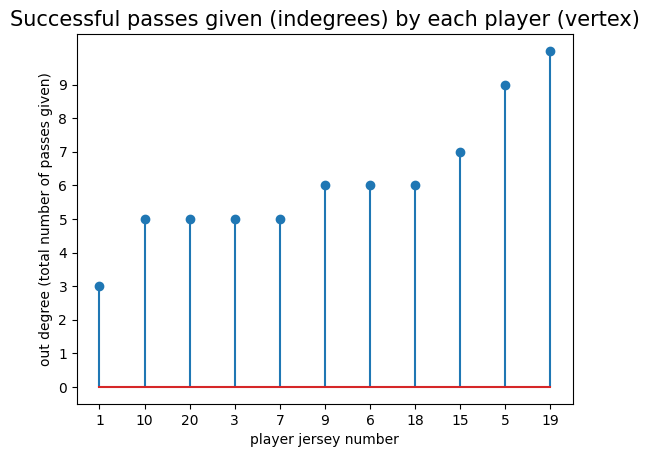

In [65]:
dic = dict(G.out_degree())
player = dic.keys()
out_degrees = dic.values()
out_degree_South_Korea = pd.DataFrame({'player':player, 'out_degrees':out_degrees})

ordered = out_degree_South_Korea.sort_values(by = 'out_degrees')
x_range = range(len(out_degree_South_Korea.index))
y_range = range(math.ceil(max(out_degree_South_Korea.out_degrees)))


plt.stem(ordered['out_degrees'])
plt.xticks(x_range, ordered['player'])
plt.yticks(y_range)
plt.xlabel("player jersey number")
plt.ylabel("out degree (total number of passes given)")
plt.title("Successful passes given (indegrees) by each player (vertex)", size=15)

## Adjacency matrix (p55)

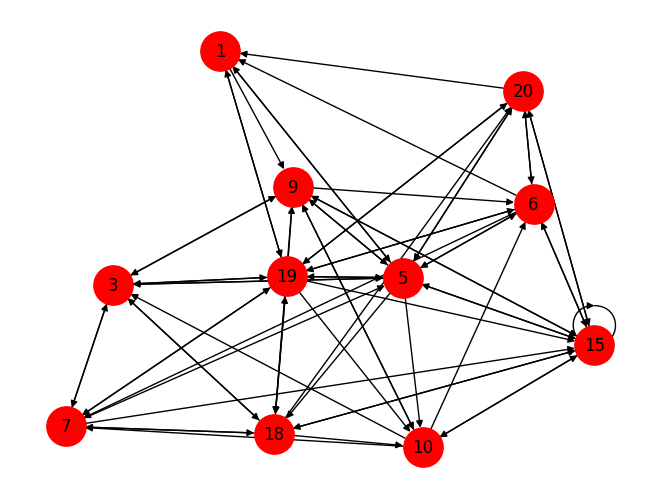

In [66]:
nx.draw(G, node_size=800, with_labels=True, node_color='red')

In [67]:
# Adjacency matrix of the pass network
A = nx.adjacency_matrix(G)
A.todense()

C:\Users\kwater\AppData\Local\Temp\ipykernel_10936\2232159568.py:2: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G)


matrix([[0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 0],
        [0, 0, 0, 3, 2, 2, 1, 0, 0, 1, 1],
        [1, 2, 0, 0, 2, 0, 0, 0, 1, 1, 0],
        [0, 4, 0, 0, 1, 1, 2, 0, 0, 0, 2],
        [2, 2, 2, 1, 1, 1, 0, 1, 0, 0, 0],
        [1, 2, 1, 2, 1, 0, 4, 3, 2, 0, 1],
        [1, 1, 1, 2, 1, 6, 0, 2, 3, 1, 1],
        [0, 0, 1, 1, 1, 0, 2, 0, 1, 1, 0],
        [1, 0, 0, 0, 0, 5, 3, 1, 0, 2, 0],
        [0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0],
        [3, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0]], dtype=int32)

## degree correlation coefficient (

In [68]:
# degree correlation coefficient of a graph
r_degree = nx.degree_pearson_correlation_coefficient(G)
r_degree

-0.19798284295600332

### A positive value of the average degree correlation value ($r_{degree}$) shows an overall positive relationship between the degrees (number of successfull passes) of two adjacent vertices (players). Whereas a negative value shows an overall negative relationship. If it is 0, there's no relationship. Also $r_{degree} \in [-1, 1]$.

### Another simpler metric for studying vertex correlations is scale freeness of a graph, given by:

$$S(G) = \sum_{i=1}^n \sum_{j=1}^n(d_i.d_j.\mathbf{A}[i, j])$$
### where $d_i$ is the degree of the vertex $v_i$ and $\mathbf{A}$ is the adjacency matrix of the graph $G$. Scale-freeness is larger when graph hubs are attached to other hubs, forming a kind of cluster. This metric can be more improved using some kind of normalization.

In [69]:
n = np.shape(A)[0]
S = 0
dic = dict(nx.degree(G)).values()
D = list(dic)

for i in range(n):
    for j in range(i+1, n):        
        d_i = D[i]
        d_j = D[j]
        S += d_i*d_j*A[i, j]
print(S)

8423


### Some distance statistics metrics

## Geodesic distance between two vertices (players) in the pass network

In [ ]:
nx.

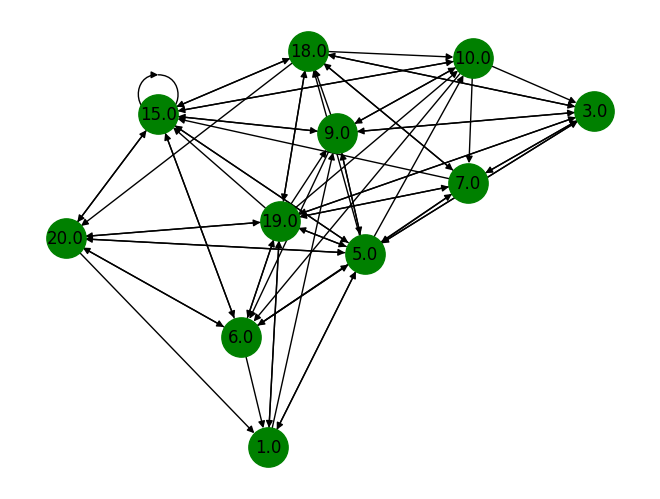

In [70]:
def inv(x): 
    return 1/x

GR = graph_South_Korea[:]
GR['pass_count'] = GR['pass_count'].apply(inv)

LR = GR.apply(tuple, axis=1).tolist()

G_inw = nx.DiGraph()
G_inw.add_weighted_edges_from(LR)
nx.draw(G_inw, node_size=800, with_labels=True, node_color='green')

In [71]:
dis = nx.shortest_path(G_inw, weight='pass_count')
dis

{9.0: {9.0: [9.0],
  6.0: [9.0, 6.0],
  10.0: [9.0, 10.0],
  3.0: [9.0, 3.0],
  18.0: [9.0, 18.0],
  15.0: [9.0, 15.0],
  5.0: [9.0, 5.0],
  19.0: [9.0, 6.0, 19.0],
  7.0: [9.0, 6.0, 7.0],
  20.0: [9.0, 6.0, 20.0],
  1.0: [9.0, 6.0, 1.0]},
 6.0: {6.0: [6.0],
  15.0: [6.0, 15.0],
  5.0: [6.0, 5.0],
  19.0: [6.0, 19.0],
  7.0: [6.0, 7.0],
  20.0: [6.0, 20.0],
  1.0: [6.0, 1.0],
  10.0: [6.0, 15.0, 10.0],
  18.0: [6.0, 15.0, 18.0],
  9.0: [6.0, 15.0, 9.0],
  3.0: [6.0, 5.0, 3.0]},
 10.0: {10.0: [10.0],
  6.0: [10.0, 6.0],
  3.0: [10.0, 3.0],
  15.0: [10.0, 15.0],
  7.0: [10.0, 7.0],
  9.0: [10.0, 9.0],
  5.0: [10.0, 6.0, 5.0],
  19.0: [10.0, 6.0, 19.0],
  20.0: [10.0, 6.0, 20.0],
  1.0: [10.0, 6.0, 1.0],
  18.0: [10.0, 3.0, 18.0]},
 20.0: {20.0: [20.0],
  6.0: [20.0, 6.0],
  15.0: [20.0, 15.0],
  5.0: [20.0, 5.0],
  19.0: [20.0, 19.0],
  1.0: [20.0, 1.0],
  7.0: [20.0, 6.0, 7.0],
  10.0: [20.0, 15.0, 10.0],
  18.0: [20.0, 15.0, 18.0],
  9.0: [20.0, 15.0, 9.0],
  3.0: [20.0, 5.0, 3.0]},
 1

## Clustering Coefficient of the graph G (p89) 그림 및 수식

In [75]:
cc = nx.average_clustering(G, weight='pass_count')
cc

0.6699876795059229

#### We can compare the average clustering coeffcient of Barcelona pass network for the same match with the average clustering coefficient of Real Madrid pass network.

## Finally we can measure the centrality of each vertex (player) in a pass network and decide which player is the most important in the network

# Add figure to explain betweenness centrality

In [76]:
bc = nx.betweenness_centrality(G, weight='pass_count')
bc

{9: 0.035,
 6: 0.05444444444444445,
 10: 0.017037037037037038,
 20: 0.017037037037037038,
 15: 0.05259259259259259,
 5: 0.10870370370370369,
 19: 0.12055555555555555,
 18: 0.034074074074074076,
 3: 0.024259259259259258,
 7: 0.01962962962962963,
 1: 0.005555555555555556}

In [77]:
max_bc = max(bc, key=bc.get)
max_bc

19

#### The jersey number 19 belongs toYoung-Gwon Kim